#Diamond Predictive Pricing Analysis

For the beginner diamonds are given a value by these principle factors


*   Carat: Carat is the weight of the diamond. Bigger the diamond, rare to find them.

*   Clarity: Clarity of the diamond is intrusions in the diamond, which could be internal flaws, external defects.

*   Color: Color of the diamond is self explinary, and on scale of AtoZ, A is best and colorless, where as Z is worst and yellowish color. The colorless diamonds are rare and costly.

*   Cut: Cut of the diamond is about physical dimensions of the diamond. It determine the light amount enter into the diamond. Anotomy of the diamond is an important parameter.

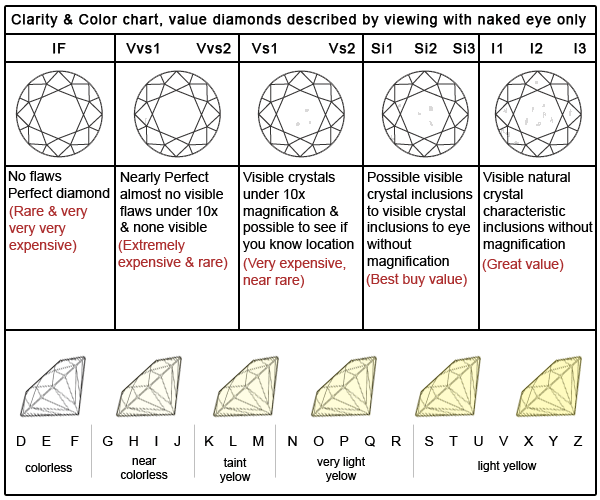

Below is the anatomy of a cut diamond.
The table length, table width, diamond depth, depth%, and table% are also important features to determine the price of a diamond.

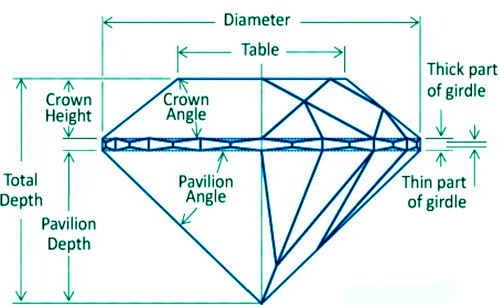

This Machine Learning Model is used to predict the Price of Diamonds based on the following parameters:

* price: The price of the Diamond
* carat: The carat value of the Diamond
* cut: The cut type of the Diamond, it determines the shine
* color: The color value of the Diamond
* clarity: The carat type of the Diamond
* depth: The depth value of the Diamond
* table: Flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above.
    * x: Width of the diamond
    * y: Length of the diamond
    * z: Height of the diamond



In [1]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
#Machine Learning & Modeling Techniques
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#Measuers test accuracy & compute error score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #8
from sklearn import metrics   #
#Save Model
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#importing the diamond_df and also eliminating the white space and null values
diamond = pd.read_csv('/content/drive/MyDrive/PredictiveAnalytics/Projects/Project1/data/diamonds.csv', na_values=['NA', '?'])   

#EDA



In [5]:
shape = diamond.shape
print(f'The shape of the imported data:\n(rows, columns)\n{shape}')

The shape of the imported data:
(rows, columns)
(53940, 10)


In [6]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We will need to address the x,y,z values and possibly some other outliers 

First we need to understand if there singular correlations between cut, color, clarity and the price of the diamonds.  Is there a correlation between the size and the price? 

What is the distribution of the samples according to the features of the diamonds. Are there outliers in the dataset? 

The diamond is classified by these attributes:

In [ ]:
columns = diamond.columns
print(f'{columns}')

In [10]:
diamond.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

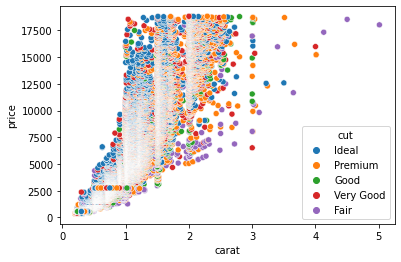

In [11]:
sns.scatterplot(x=diamond.carat , y=diamond.price, hue=diamond.cut)

In [12]:
diamond.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

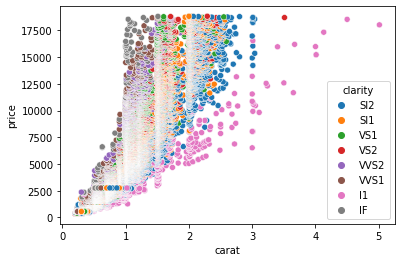

In [13]:
sns.scatterplot(x=diamond.carat , y=diamond.price, hue=diamond.clarity)

In [14]:
diamond.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [15]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


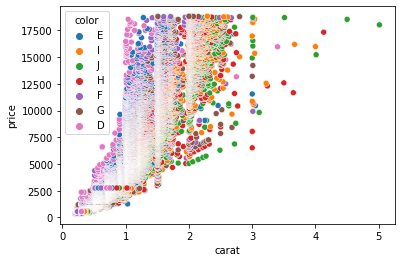

In [16]:
sns.scatterplot(x=diamond.carat , y=diamond.price, hue=diamond.color)

In [17]:

# original statistics.
diamond['price/wt']=diamond['price']/diamond['carat'] 
cut = diamond.groupby('cut')['price/wt'].mean().sort_values()
color = diamond.groupby('color')['price/wt'].mean().sort_values()
clarity = diamond.groupby('clarity')['price/wt'].mean().sort_values()

print(f'The count of each sorted by Price/Carat:\n{cut}\n{color}\n{clarity}')

The count of each sorted by Price/Carat:
cut
Fair         3767.255681
Good         3860.027680
Ideal        3919.699825
Very Good    4014.128366
Premium      4222.905374
Name: price/wt, dtype: float64
color
E    3804.611475
J    3825.649192
D    3952.564280
I    3996.402051
H    4008.026941
F    4134.730684
G    4163.411524
Name: price/wt, dtype: float64
clarity
I1      2796.296437
SI1     3849.078018
VVS1    3851.410558
SI2     4010.853865
VS2     4080.526787
VS1     4155.816808
VVS2    4204.166013
IF      4259.931736
Name: price/wt, dtype: float64


#Data Cleaning


##diamond_df

###removing duplicates 

they are extreme case of nonrandom sampling, and they bias your fitted model. Including them will essentially lead to the model overfitting this subset of points.



In [18]:
# drop duplicate data 
diamond_df = diamond.drop_duplicates()
diamond_df.shape == diamond.shape  
shape2 = diamond_df.shape
#before duplicate data was removed (53940, 10)
print(f'The shape of the data after removing duplicate rows is:\n{shape2}\n146 rows were removed')

The shape of the data after removing duplicate rows is:
(53794, 11)
146 rows were removed


###removing outliers
-the bulk of the data is less than 3 carots. 

In [19]:
#Removing the outliers (carats >= 3) 
#Will give a more accurate prediction in that 
#the bulk of the data set is between ...min max carat

In [20]:
diamond_df = diamond_df.loc[diamond_df['carat']<3,['carat','cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']]
print(f'The shape of the data including less than 3 Carat diamonds is:\n{shape2}\n38 rows were removed')

The shape of the data including less than 3 Carat diamonds is:
(53794, 11)
38 rows were removed


###removing x,y,z values == 0 
Can see that the minimum values in x,y,z are 0 in the describe above,


In [21]:
diamond_df = diamond_df.drop(diamond_df[diamond_df['x']==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df['y']==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df['z']==0].index)
print(f'The shape of the data after removing duplicate rows is:\n{shape2}\n19 rows were removed')

The shape of the data after removing duplicate rows is:
(53794, 11)
19 rows were removed


In [22]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53737.000000,53737.000000,53737.000000,53737.000000,53737.000000,53737.000000,53737.000000
mean,0.795770,61.747693,57.456938,3923.759253,5.728949,5.732345,3.538309
std,0.468471,1.428099,2.232516,3976.331189,1.114575,1.135717,0.699434
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5315.000000,6.540000,6.530000,4.030000
max,2.800000,79.000000,95.000000,18823.000000,9.170000,58.900000,31.800000


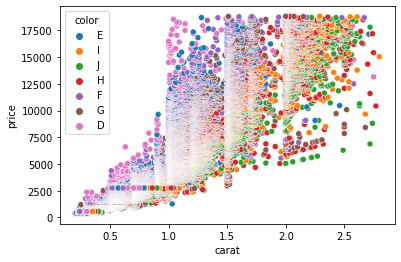

In [23]:
sns.scatterplot(x=diamond_df.carat , y=diamond_df.price, hue=diamond_df.color)

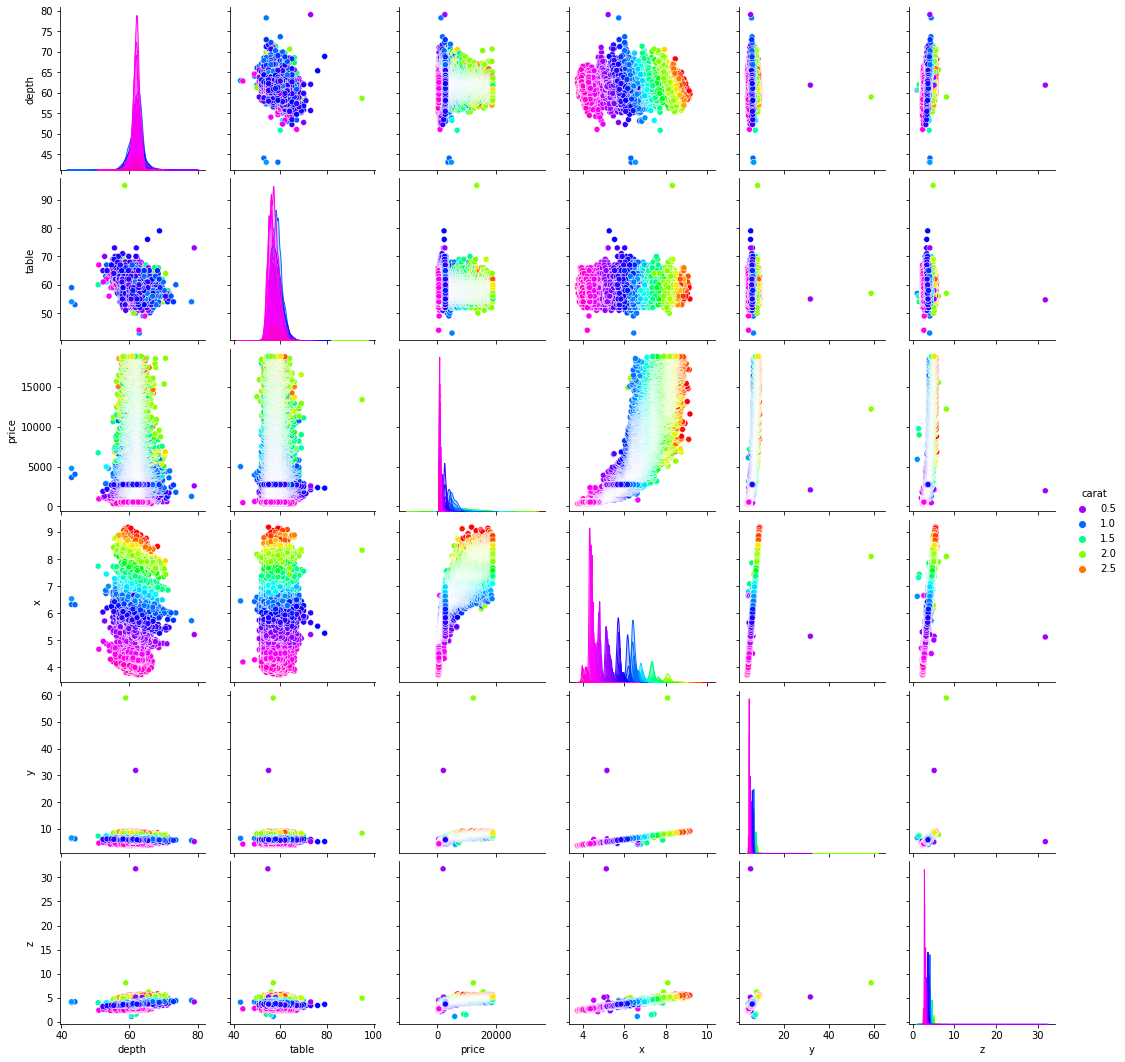

In [24]:

sns.pairplot(diamond_df, hue='carat', palette='gist_rainbow_r')

understanding the remaining outliers using regression plots so we can further see what those data points are.

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

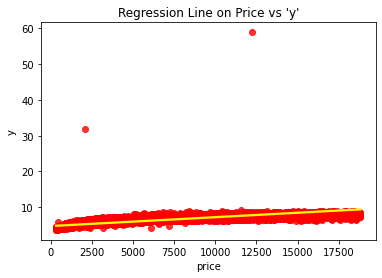

In [25]:

# can see that anything >30 is an outlier
ax = sns.regplot(x='price', y='y', data=diamond_df, fit_reg=True, scatter_kws={'color': 'red'}, line_kws={'color': 'yellow'})
ax.set_title("Regression Line on Price vs 'y'")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

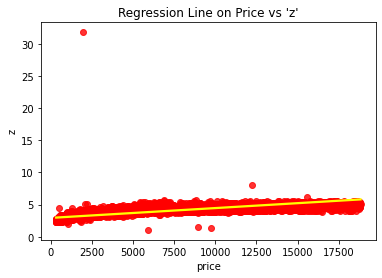

In [26]:

# can see that anything >10 is an outlier
ax = sns.regplot(x='price', y='z', data=diamond_df, fit_reg=True, scatter_kws={'color': 'red'}, line_kws={'color': 'yellow'})
ax.set_title("Regression Line on Price vs 'z'")

Text(0.5, 1.0, "Regression Line on Price vs 'depth'")

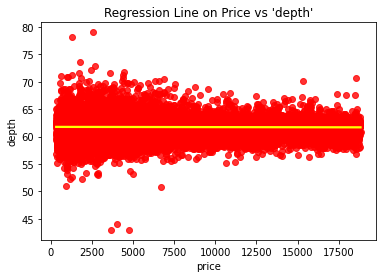

In [27]:

#>50 <75
ax = sns.regplot(x='price', y='depth', data=diamond_df, fit_reg=True, scatter_kws={'color': 'red'}, line_kws={'color': 'yellow'})
ax.set_title("Regression Line on Price vs 'depth'")

Text(0.5, 1.0, "Regression Line on Price vs 'table'")

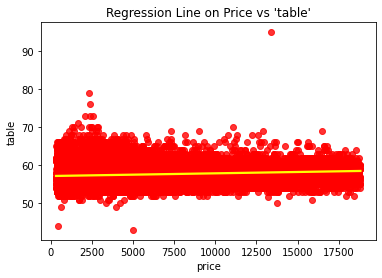

In [28]:

# can see that anything >45<75 is an outlier
ax = sns.regplot(x='price', y='table', data=diamond_df, fit_reg=True, scatter_kws={'color': 'red'}, line_kws={'color': 'yellow'})
ax.set_title("Regression Line on Price vs 'table'")

In [29]:

diamond_df = diamond_df[(diamond_df['depth']>50)&(diamond_df['depth']<75)]
diamond_df = diamond_df[(diamond_df['table']>45)&(diamond_df['table']<80)]
diamond_df = diamond_df[(diamond_df['x']<30)]
diamond_df = diamond_df[(diamond_df['y']<30)]
diamond_df = diamond_df[(diamond_df['z']>2)&(diamond_df['z']<30)]
print(f'The shape of the data after removing remaining outliers is:\n{shape2}\n14 rows were removed')

The shape of the data after removing remaining outliers is:
(53794, 11)
14 rows were removed


In [30]:

#summary of  Object (String) features ['O']
strvar = diamond_df.describe(include=['O'])
print(f"Categorical column's details :\n{strvar}")


Categorical column's details :
          cut  color clarity
count   53723  53723   53723
unique      5      7       8
top     Ideal      G     SI1
freq    21475  11250   13026


math that subtracts...{shape-shape2}??

In [31]:

diamond_df.shape

(53723, 10)

In [32]:

#146+19+38+14 total rows of data removed 
print(f'In total 218 rows were removed') #(53940, 10) can create a mathmatical function to do this on its own

In total 218 rows were removed


###creating dummy variables for categorical variables
- The dataset includes 3 categorical variables (cut, color, and clarity). I chose to create dummy variables for those categorical variables using a “replace” function. *** In including these dummy variables in the test train sets the linear regression model gives negative pricing features back. (outliers may be the issue)

In [33]:
diamond_df.cut.replace({'Ideal':5, 'Premium':4, 'Good':2, 'Very Good':3, 'Fair':1}, inplace=True)
diamond_df.color.replace({'E':2, 'I':6, 'J':7, 'H':5, 'F':3, 'G':4, 'D':1}, inplace=True)
diamond_df.clarity.replace({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8}, inplace=True)

In [34]:

diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,1,63.3,58.0,335,4.34,4.35,2.75


In [35]:

 diamond_df.dtypes 

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

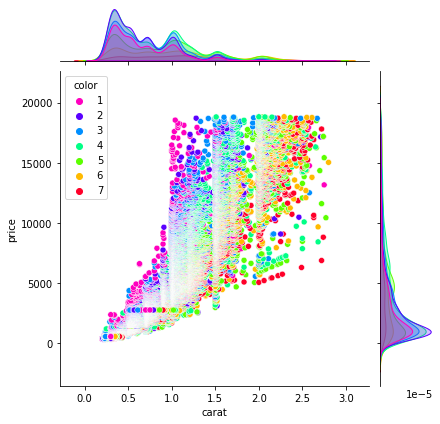

In [36]:

sns.jointplot(x=diamond_df.carat , y=diamond_df.price, hue=diamond_df.color, palette='gist_rainbow_r' )

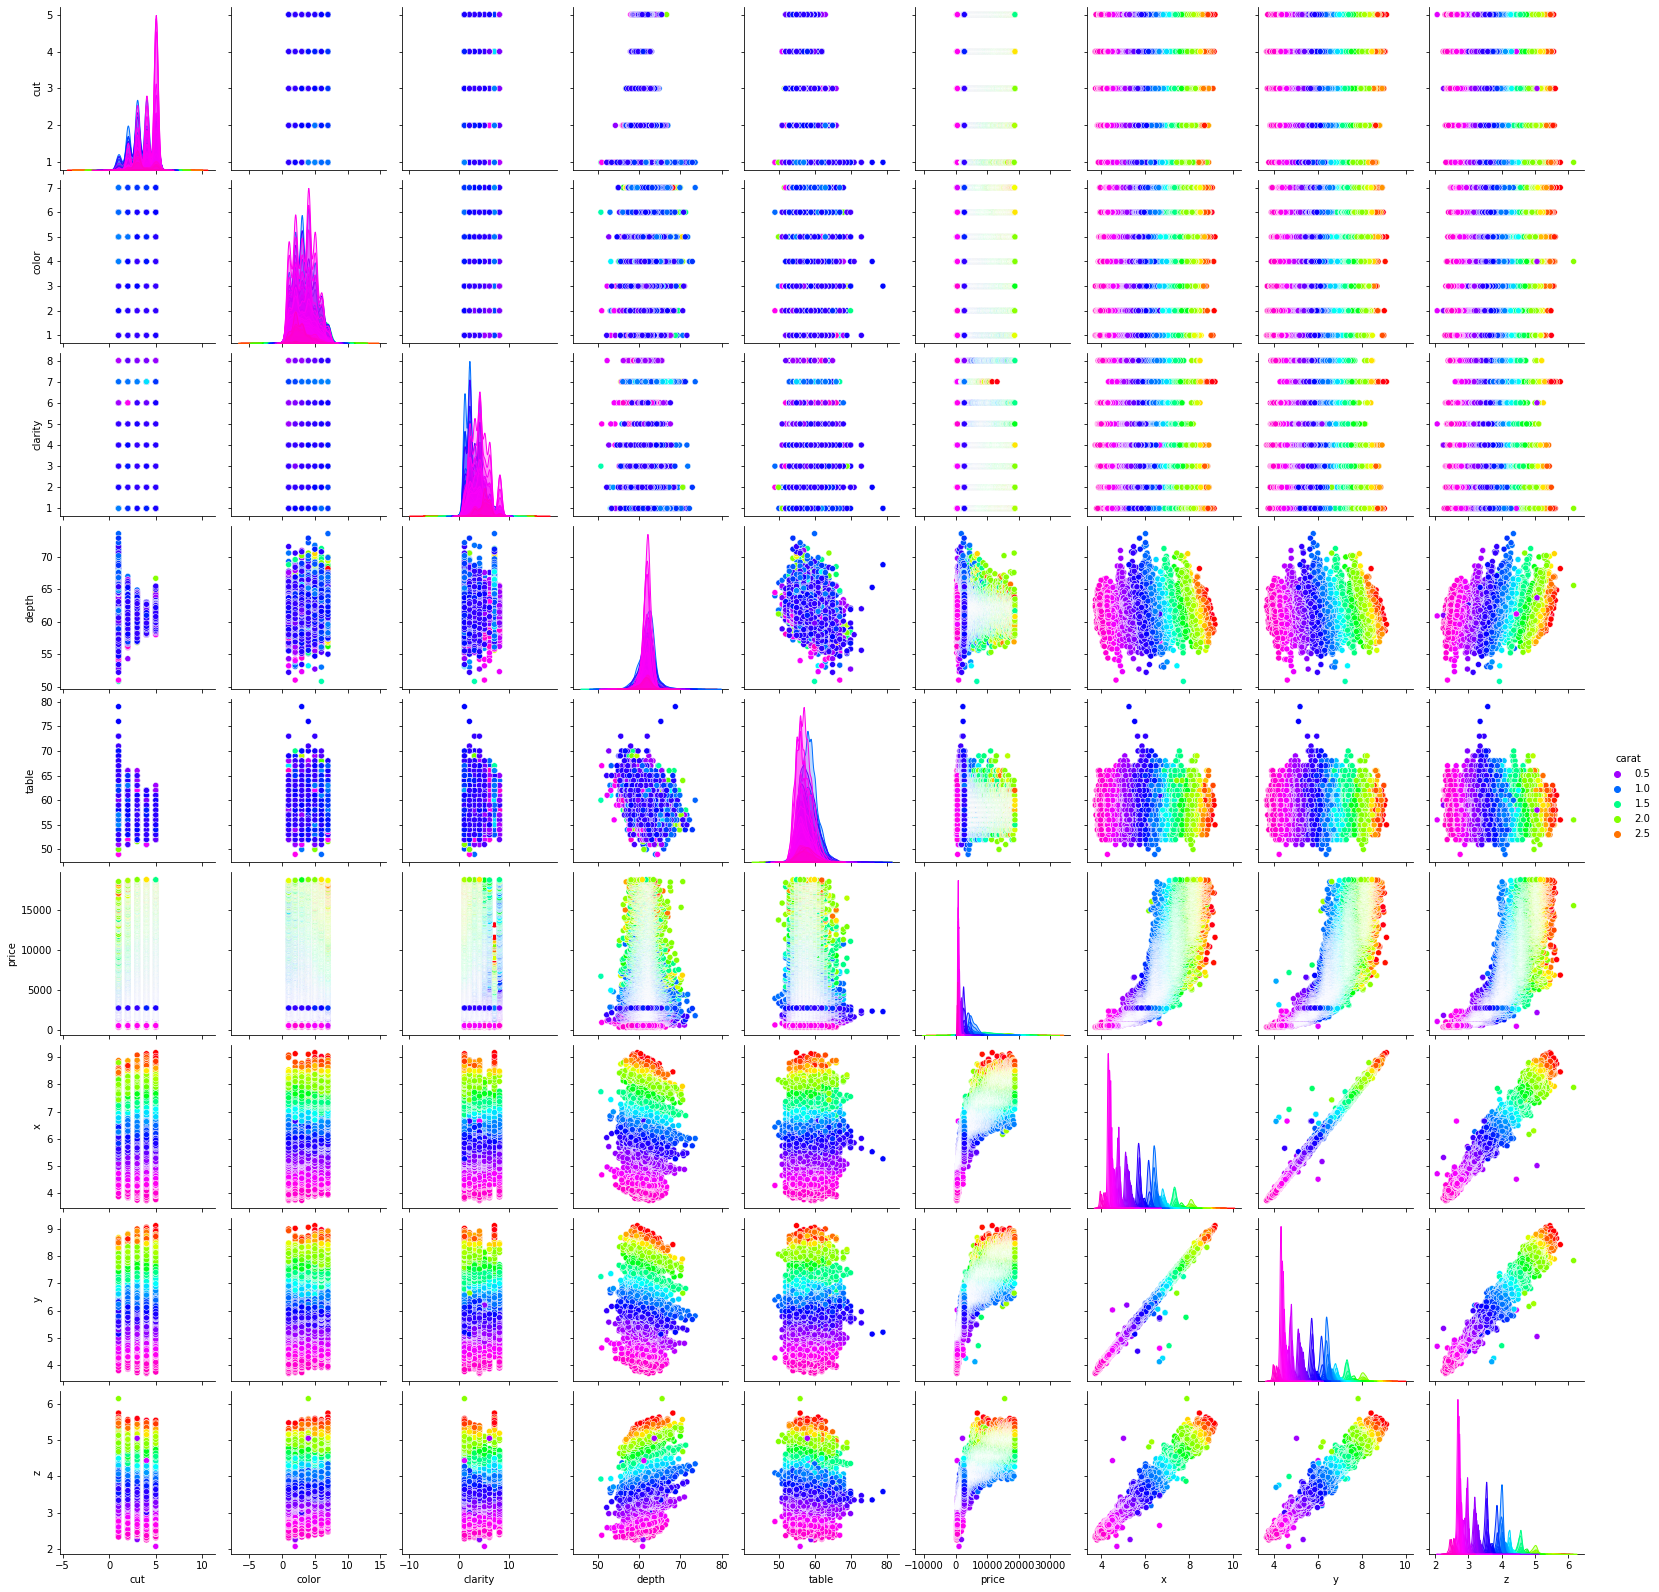

In [37]:
sns.pairplot(diamond_df, hue='carat', palette='gist_rainbow_r')

###More relational statistics
 Compare changes after the removal of outlier data. 
 Compare the price per unit carat with each of the other catagorical data cut, color, clarity. 
  * table and depth to be considered also at some point

In [49]:

# Final? statistics.
diamond_df['price/wt']=diamond_df['price']/diamond_df['carat'] 
cut = diamond_df.groupby('cut')['price/wt'].mean().sort_values()
#cut stats before
#Fair         3767.255681
#Good         3860.027680
#Ideal        3919.699825
#Very Good    4014.128366
#Premium      4222.905374
color = diamond_df.groupby('color')['price/wt'].mean().sort_values()
#color stats before
#E    3804.611475
#J    3825.649192
#D    3952.564280
#I    3996.402051
#H    4008.026941
#F    4134.730684
#G    4163.411524
clarity = diamond_df.groupby('clarity')['price/wt'].mean().sort_values()
#clarity stats before
#I1      2796.296437
#SI1     3849.078018
#VVS1    3851.410558
#SI2     4010.853865
#VS2     4080.526787
#VS1     4155.816808
#VVS2    4204.166013
#IF      4259.931736
ccc = diamond_df.groupby(['clarity','cut','color'])['price/wt'].mean().sort_values()
print(f'The count of each sorted by Price/Carat:\n{cut}\n{color}\n{clarity}\n{ccc}')

The count of each sorted by Price/Carat:
cut
1.0    3758.511230
2.0    3857.991211
5.0    3921.880371
3.0    4014.717041
4.0    4221.894531
Name: price/wt, dtype: float32
color
2.0    3807.293701
7.0    3823.468750
1.0    3954.072754
6.0    3990.735107
5.0    4006.550293
3.0    4135.785156
4.0    4165.217285
Name: price/wt, dtype: float32
clarity
7.0    2768.861572
2.0    3848.785645
6.0    3851.166016
1.0    4007.947021
4.0    4081.255371
3.0    4157.431152
5.0    4205.713867
8.0    4263.184570
Name: price/wt, dtype: float32
clarity  cut  color
7.0      1.0  3.0       2187.008789
8.0      3.0  7.0       2245.620605
7.0      1.0  4.0       2250.050293
              2.0       2251.244141
         2.0  3.0       2314.212891
                           ...     
8.0      4.0  2.0       5817.339355
         5.0  1.0       9034.176758
         4.0  1.0      10099.078125
         2.0  1.0      10876.804688
         3.0  1.0      11346.511719
Name: price/wt, Length: 276, dtype: float32


In [50]:
diamond_df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z,price/wt
carat,1.000000,-0.131264,0.289688,-0.287711,0.026545,0.181151,0.923489,0.979112,0.978271,0.978168,0.777791
cut,-0.131264,1.000000,-0.019737,0.141550,-0.218219,-0.434711,-0.050813,-0.123282,-0.122972,-0.149036,0.005982
color,0.289688,-0.019737,1.000000,0.022099,0.048771,0.026022,0.169918,0.268680,0.268493,0.273302,0.011258
clarity,-0.287711,0.141550,0.022099,1.000000,-0.027375,-0.134017,-0.141129,-0.310039,-0.307397,-0.309966,0.010431
depth,0.026545,-0.218219,0.048771,-0.027375,1.000000,-0.301904,-0.011728,-0.026061,-0.029180,0.095987,-0.035822
table,0.181151,-0.434711,0.026022,-0.134017,-0.301904,1.000000,0.125694,0.195187,0.188950,0.154554,0.083867
price,0.923489,-0.050813,0.169918,-0.141129,-0.011728,0.125694,1.000000,0.886769,0.888355,0.882195,0.914679
x,0.979112,-0.123282,0.268680,-0.310039,-0.026061,0.195187,0.886769,1.000000,0.998645,0.991650,0.793384
y,0.978271,-0.122972,0.268493,-0.307397,-0.029180,0.188950,0.888355,0.998645,1.000000,0.991316,0.796516
z,0.978168,-0.149036,0.273302,-0.309966,0.095987,0.154554,0.882195,0.991650,0.991316,1.000000,0.787005


the above correlation matrix shows:
the strongest correlations are found between price and x .89, y .89, z .88, then carat .92. 

with price/wt also having strong correlations with xyz  price/ wt is price divided by carat. 

In [51]:
diamond_df.cov()

,carat,cut,color,clarity,depth,table,price,x,y,z,price/wt
carat,0.219434,-0.068574,0.230778,-0.237814,0.017630,0.188722,1.720120e+03,0.511180,0.507116,0.315361,7.336369e+02
cut,-0.068574,1.243725,-0.037433,0.278549,-0.345030,-1.078182,-2.253253e+02,-0.153233,-0.151762,-0.114392,1.343237e+01
color,0.230778,-0.037433,2.892165,0.066314,0.117591,0.098420,1.149015e+03,0.509257,0.505290,0.319887,3.855231e+01
clarity,-0.237814,0.278549,0.066314,3.113551,-0.068482,-0.525919,-9.901918e+02,-0.609724,-0.600239,-0.376430,3.706195e+01
depth,0.017630,-0.345030,0.117591,-0.068482,2.010046,-0.951920,-6.611487e+01,-0.041179,-0.045782,0.093660,-1.022633e+02
table,0.188722,-1.078182,0.098420,-0.525919,-0.951920,4.946050,1.111522e+03,0.483803,0.465021,0.236566,3.755665e+02
price,1720.120239,-225.325318,1149.014838,-990.191776,-66.114871,1111.522426,1.581065e+07,3929.832992,3908.923860,2414.247766,7.323347e+06
x,0.511180,-0.153233,0.509257,-0.609724,-0.041179,0.483803,3.929833e+03,1.242161,1.231675,0.760658,1.780485e+03
y,0.507116,-0.151762,0.505290,-0.600239,-0.045782,0.465021,3.908924e+03,1.231675,1.224594,0.755006,1.774830e+03
z,0.315361,-0.114392,0.319887,-0.376430,0.093660,0.236566,2.414248e+03,0.760658,0.755006,0.473679,1.090651e+03


The above covariance shows

In [52]:
#numeric list of the diamond dataframe
#turning it into an np.array so we can work with it in a more stream lined computation
#np.floats with 32 bit is standard for computing
numeric_list2 = diamond_df.select_dtypes(include=[np.number]).columns
diamond_df[numeric_list2] = diamond_df[numeric_list2].astype(np.float32)

In [42]:
diamond_df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,price/wt
count,53723.000000,53723.000000,53723.000000,53723.000000,53723.000000,53723.000000,53723.000000,53723.000000,53723.000000,53723.000000,53723.000000
mean,0.795698,3.905124,3.592316,3.256073,61.748203,57.456856,3923.366943,5.728789,5.730748,3.537718,4008.735596
std,0.468438,1.115224,1.700637,1.764526,1.417761,2.223972,3976.260498,1.114523,1.106614,0.688244,2013.567017
min,0.200000,1.000000,1.000000,1.000000,50.799999,49.000000,326.000000,3.730000,3.680000,2.060000,1051.162842
25%,0.400000,3.000000,2.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2477.777832
50%,0.700000,4.000000,4.000000,3.000000,61.799999,57.000000,2400.000000,5.700000,5.710000,3.530000,3494.444336
75%,1.040000,5.000000,5.000000,4.000000,62.500000,59.000000,5315.000000,6.540000,6.530000,4.030000,4949.176514
max,2.800000,5.000000,7.000000,8.000000,73.599998,79.000000,18823.000000,9.170000,9.130000,6.160000,17828.845703


###splitting

In [53]:
#X and y values
X = diamond_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']].values
y = diamond_df['price'].values

In [54]:
type(y) #diamond_df

numpy.ndarray

In [55]:
type(X) #diamond_df

numpy.ndarray

In [56]:
#Splitting data set for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 33) #diamond_df

In [57]:
#Splitting data set for training/testing
#REspecify that the train diamonds is a float of 32bytes
X_train = X_train.astype(np.float32)

In [58]:
#looking at the diamond_df shape
#printing with f-string \train and test diamonds\seeing the shape of all of the diamonds
print(f'The shape of the split data is: \n X_train: \t{X_train.shape} \n X_test: \t{X_test.shape} \n y_train: \t{y_train.shape} \n y_test: \t{y_test.shape}')

The shape of the split data is: 
 X_train: 	(42978, 9) 
 X_test: 	(10745, 9) 
 y_train: 	(42978,) 
 y_test: 	(10745,)


##diamond_df2
scaling the data with out cleaning in hopes that i understood that the scaling and then feeding it into the trees does the cleaning of outliers


In [65]:
#original dataframe without cleaning
shape = diamond.shape
print(f'{shape}')

(53940, 11)


In [66]:
diamond_df2 = diamond[(diamond['depth']>50)&(diamond['depth']<75)]
diamond_df2 = diamond[(diamond['table']>45)&(diamond['table']<80)]
diamond_df2 = diamond[(diamond['x']<30)]
diamond_df2 = diamond[(diamond['y']<30)]
diamond_df2 = diamond[(diamond['z']>2)&(diamond['z']<30)]
diamond_df2 = diamond[(diamond['carat']<4)]
shapedf2 = diamond_df2.shape
print(f'The shape of the data after removing remaining outliers is:\n{shapedf2}\n6 rows were removed')


The shape of the data after removing remaining outliers is:
(53934, 11)
6 rows were removed


In [67]:
diamond_df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price/wt
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


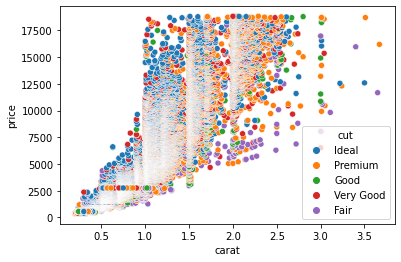

In [68]:
sns.scatterplot(x=diamond_df2.carat , y=diamond_df2.price, hue=diamond_df2.cut)

###creating dummy variables

In [71]:
X = diamond_df2[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']].values
y = diamond_df2['price'].values

In [72]:
diamond_df2.cut.replace({'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}, inplace=True)
diamond_df2.color.replace({'E':2,'I':6,'J':7,'H':5,'F':3,'G':4,'D':1}, inplace=True)
diamond_df2.clarity.replace({'SI2':1,'SI1':2,'VS1':3,'VS2':4,'VVS2':5,'VVS1':6,'I1':7,'IF':8}, inplace=True)

In [74]:
diamond_df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price/wt
0,0.23,5,2,1,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,4,2,2,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,2,2,3,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,2,7,1,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [76]:
numeric_list = diamond_df2.select_dtypes(include=[np.number]).columns
diamond_df2[numeric_list] = diamond_df2[numeric_list].astype(np.float32)

In [77]:
diamond_df2.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,price/wt
count,53934.000000,53934.000000,53934.000000,53934.000000,53934.000000,53934.000000,53934.000000,53934.000000,53934.000000,53934.000000,53934.000000
mean,0.797553,3.904272,3.593893,3.255720,61.749180,57.456921,3931.377441,5.730661,5.734041,3.538407,4008.405029
std,0.472599,1.116445,1.700936,1.766196,1.432421,2.234413,3987.357666,1.120834,1.141272,0.705052,2012.776245
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1051.162842
25%,0.400000,3.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2477.777832
50%,0.700000,4.000000,4.000000,3.000000,61.799999,57.000000,2401.000000,5.700000,5.710000,3.530000,3494.633179
75%,1.040000,5.000000,5.000000,4.000000,62.500000,59.000000,5323.750000,6.540000,6.540000,4.037500,4949.630981
max,3.670000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,9.860000,58.900002,31.799999,17828.845703


###splitting

In [78]:
type(X) #diamond_df2

numpy.ndarray

In [79]:
type(y) #diamond_df2

numpy.ndarray

In [80]:
#Splitting data set for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 33) #diamond_df2


In [81]:
#Splitting data set for training/testing
#REspecify that the train diamond_df2s is a float of 32bytes
X_train = X_train.astype(np.float32)

###scaling

In [82]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [83]:
#looking at the diamond_df2 shape
#printing with f-string \train and test diamonds\seeing the shape of all of the diamonds
print(f'The shape of the split diamond_df2 is: \n X_train: \t{X_train.shape} \n X_test: \t{X_test.shape} \n y_train: \t{y_train.shape} \n y_test: \t{y_test.shape}')

The shape of the split diamond_df2 is: 
 X_train: 	(43147, 9) 
 X_test: 	(10787, 9) 
 y_train: 	(43147,) 
 y_test: 	(10787,)


In [84]:
X_train

array([[ 0.43156666,  0.08981837, -0.93410474, ...,  0.65343904,
         0.5996191 ,  0.6120528 ],
       [ 0.21937504, -0.8053983 , -0.93410474, ...,  0.46576327,
         0.48622802,  0.32912764],
       [-0.5869528 ,  0.98503506,  0.8282987 , ..., -0.5351737 ,
        -0.4994012 , -0.49135494],
       ...,
       [-1.032555  , -1.7006149 ,  1.4157665 , ..., -1.3126873 ,
        -1.2669705 , -1.1703751 ],
       [-0.20500803,  0.98503506,  0.8282987 , ...,  0.01891635,
         0.05010894, -0.03867494],
       [ 1.025703  ,  0.98503506, -0.34663692, ...,  1.1449708 ,
         1.0880724 ,  1.1071719 ]], dtype=float32)

#Machine Learning 

In [ ]:
#mae = mean_absolute_error(Y_test,y_pred)
#print("mae: %f" %(mae))

In [ ]:
#neeed to figure out what the {:,2%} is 
#print('R squared of the Linear Regression on training set: {:.2%}'.format(LR.score(X_train, y_train)))
#print('R squared of the Linear Regression on test set: {:.2%}'.format(LR.score(X_test, y_test)))

##Models- multiple trained at once.

Both the diamond and diamond_df produce the same results for the 

In [59]:
#bring in a variables for both diamond and diamond_df 
LinearRegression_model1 = LinearRegression()
DecisionTree_model1 = DecisionTreeRegressor()
RandomForest_model1 = RandomForestRegressor()
XGBRegressor_model1 = XGBRegressor()

LinearRegression_model = LinearRegression()
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
XGBRegressor_model = XGBRegressor()

###diamond_df_ML_model1
overfit before scaling trained is at 100%


In [60]:
#diamond_df
#creating a list of models to save time. 4 models trained in one line
models2 = [LinearRegression_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]
for model in models2:
    model.fit(X_train, y_train)
    print(f'{model} is trained!')

LinearRegression() is trained!
DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
[01:16:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor() is trained!


In [61]:
#diamond_df
#Machine Learning
#now we want to get the accuracy on training data. creating the score
accuracy_LinearRegression2 = LinearRegression_model.score(X_train, y_train)
accuracy_DecisionTree2 = DecisionTree_model.score(X_train, y_train)
accuracy_RandomForest2 = RandomForest_model.score(X_train, y_train)
accuracy_XGBoost2 = XGBRegressor_model.score(X_train, y_train)

In [62]:
#diamond_df
#Machine Learning
#creating a dictionary  now can choose which model works best
models2 = {'LinearRegression_model': accuracy_LinearRegression2, 'DecisionTree_model': accuracy_DecisionTree2, 'RandomForest_model': accuracy_RandomForest2, 
          'XGBRegressor_model': accuracy_XGBoost2}
for model, score in models2.items():
    print(f'The accuracy score for the train {model} is {round(score * 100, 2)}%')

The accuracy score for the train LinearRegression_model is 89.75%
The accuracy score for the train DecisionTree_model is 100.0%
The accuracy score for the train RandomForest_model is 99.73%
The accuracy score for the train XGBRegressor_model is 97.31%


In [63]:

#Machine Learning
#now we want to get the accuracy. creating the score
test_accuracy_LinearRegression2 = LinearRegression_model.score(X_test, y_test)
test_accuracy_DecisionTree2 = DecisionTree_model.score(X_test, y_test)
test_accuracy_RandomForest2 = RandomForest_model.score(X_test, y_test)
test_accuracy_XGBoost2 = XGBRegressor_model.score(X_test, y_test)

In [64]:

#Machine Learning
#creating a dictionary  now can choose which model works best
models2 = {'LinearRegression_model': test_accuracy_LinearRegression2, 'DecisionTree_model': test_accuracy_DecisionTree2, 'RandomForest_model': test_accuracy_RandomForest2, 
          'XGBRegressor_model': test_accuracy_XGBoost2}
for model, score in models2.items():
    print(f'The accuracy score for the test {model} is {round(score * 100, 2)}%')

The accuracy score for the test LinearRegression_model is 89.22%
The accuracy score for the test DecisionTree_model is 96.63%
The accuracy score for the test RandomForest_model is 98.2%
The accuracy score for the test XGBRegressor_model is 97.24%


###diamond_df2_ML_model2
scaling ...with only a few outliers removed


In [85]:
#diamond
#creating a list of models to save time. 4 models trained in one line
models1 = [LinearRegression_model1, DecisionTree_model1, RandomForest_model1, XGBRegressor_model1]
for model1 in models1:
    model1.fit(X_train, y_train)
    print(f'{model1} is trained!')

LinearRegression() is trained!
DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
[01:19:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor() is trained!


In [86]:
#diamond
#Machine Learning
#now we want to get the accuracy on training data. creating the score
accuracy_LinearRegression1 = LinearRegression_model1.score(X_train, y_train)
accuracy_DecisionTree1 = DecisionTree_model1.score(X_train, y_train)
accuracy_RandomForest1 = RandomForest_model1.score(X_train, y_train)
accuracy_XGBoost1 = XGBRegressor_model1.score(X_train, y_train)

In [87]:
#diamond
#Machine Learning
#creating a dictionary  now can choose which model works best
models1 = {'LinearRegression_model1': accuracy_LinearRegression1, 'DecisionTree_model1': accuracy_DecisionTree1, 'RandomForest_model1': accuracy_RandomForest1, 
          'XGBRegressor_model1': accuracy_XGBoost1}
for model1, score in models1.items():
    print(f'The accuracy score for the train {model1} is {round(score * 100, 2)}%')

The accuracy score for the train LinearRegression_model1 is 88.98%
The accuracy score for the train DecisionTree_model1 is 100.0%
The accuracy score for the train RandomForest_model1 is 99.73%
The accuracy score for the train XGBRegressor_model1 is 97.22%


In [88]:
#diamond
#Machine Learning
#now we want to get the accuracy. creating the score
test_accuracy_LinearRegression1 = LinearRegression_model1.score(X_test, y_test)
test_accuracy_DecisionTree1 = DecisionTree_model1.score(X_test, y_test)
test_accuracy_RandomForest1 = RandomForest_model1.score(X_test, y_test)
test_accuracy_XGBoost1 = XGBRegressor_model1.score(X_test, y_test)

In [89]:

#Machine Learning
#creating a dictionary  now can choose which model works best
models1 = {'LinearRegression_model1': test_accuracy_LinearRegression1, 'DecisionTree_model1': test_accuracy_DecisionTree1, 'RandomForest_model1': test_accuracy_RandomForest1, 
          'XGBRegressor_model1': test_accuracy_XGBoost1}
for model1, score in models1.items():
    print(f'The accuracy score for the test {model1} is {round(score * 100, 2)}%')

The accuracy score for the test LinearRegression_model1 is 88.36%
The accuracy score for the test DecisionTree_model1 is 96.05%
The accuracy score for the test RandomForest_model1 is 97.88%
The accuracy score for the test XGBRegressor_model1 is 96.82%


#

#TEST

In [88]:

#based on the 7 columns making a feature called testing vector
test_x = np.zeros((1, 9))
test_x

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [89]:

#now assigning values to the test value x
#0.75	5.0	1.0	1.0	62.200001	55.0	2757.0	5.83	5.87	3.64
#	0.29	4.0	6.0	4.0	62.400002	58.0	334.0	4.20	4.23	2.63	1151.724121
test_x[0, 0] = .29
test_x[0, 1] = 4.00
test_x[0, 2] = 6.00
test_x[0, 3] = 4.00
test_x[0, 4] = 62.40
test_x[0, 5] = 58.00
test_x[0, 6] = 4.2
test_x[0, 7] = 4.23
test_x[0, 8] = 2.63
test_x

array([[ 0.29,  4.  ,  6.  ,  4.  , 62.4 , 58.  ,  4.2 ,  4.23,  2.63]])

In [90]:

prediction = LinearRegression_model1.predict(test_x)   #??????
round(float(prediction[0]), 2)
#at two precission intervals

-16575.83

In [91]:

#now a list of all the models no quotes
models1 = [LinearRegression_model1, DecisionTree_model1, RandomForest_model1, XGBRegressor_model1]

In [92]:

#running a loop for models in models predict and print with fstring
#linear predicted the best
for model1 in models1:
    prediction = model1.predict(test_x)
    print(f'The model {model1} predicts an price of {round(float(prediction[0]), 2)}')

The model LinearRegression() predicts an price of -16575.83
The model DecisionTreeRegressor() predicts an price of 2322.0
The model RandomForestRegressor() predicts an price of 5514.69
The model XGBRegressor() predicts an price of 11956.81


 test of numbers predicts

DecisionTree prediction was exact based on features inputed into test variables.

> i played around with a few rows and found that the Linear Regression Model was less predictable giving pricing in the negatives or far above the actual price





The accuracy score for the DecisionTree_model is 0.9647  

In [93]:

#calling it model file holding the folder
model_file = '/content/drive/MyDrive/PredictiveAnalytics/Projects/Project1'

In [ ]:

#Desicion Tree diamond_df
with open('dtm1_file', 'wb') as file:#saving the DTfile
    model1 = pickle.dump(DecisionTree_model, file)

#Desicion Tree diamond
with open('dtm_file', 'wb') as file:#saving the DTfile
    model = pickle.dump(DecisionTree_model1, file)